# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shreya Bhootda

EID: sb58653

Name: Harsh Mehta

EID: hdm564

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?


## Answer:
Gradient Boosting combines the concepts of Boosting and Gradient Descent, it has three components - additive model, loss function and a weak learner. It identifies complex data points by their large residuals in the previous iteration and splits them further. Predictions are made by votes of the weak learners and is weighted based on their accuracy. AdaBoost or adaptive boosting adjusts its parametres according to its performance in a given iteration i.e. the weights for re-weighing the data and the final aggregation are computed in itterations. 

Key Differences :
1. AdaBoost minimizes the exponential loss function whereas gradient boosting can utitlise any loss function that is differentiable.
2. AdaBoost is more **senstive to outliers** than gradient boosting
3. Gradient boosting is **more accurate, less greedy, robust and interpretable** than Adaboost


# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
import pandas as pd

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

## part a)

In [9]:
from sklearn.svm import SVC
def train_model(X, y, kernel, C, gamma):
  svc = SVC(C=C, kernel=kernel, gamma = gamma)
  svc.fit(X, y)
  return svc

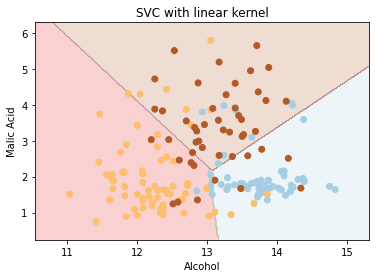

In [10]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## part b)

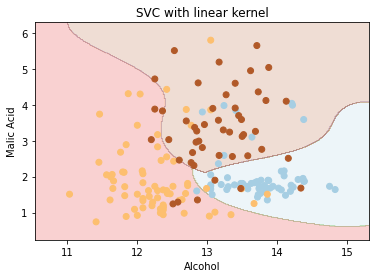

In [12]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## Observation : 
From the outputs we could observe that "rbf" is able to make non-linear boundaries, and since our data set is not divided linearly it is performing better than the linear kernel.

## part c)

Plot for gamma value:  0.5


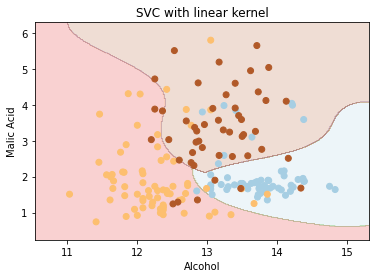

Plot for gamma value:  1


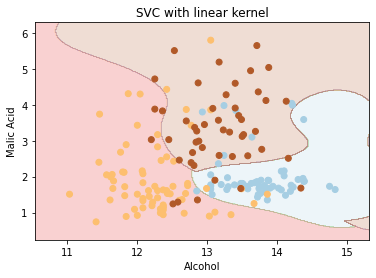

Plot for gamma value:  10


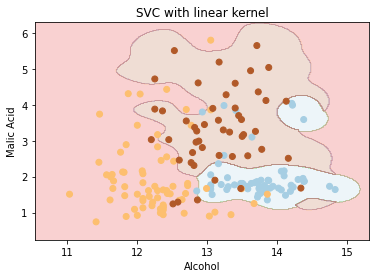

Plot for gamma value:  100


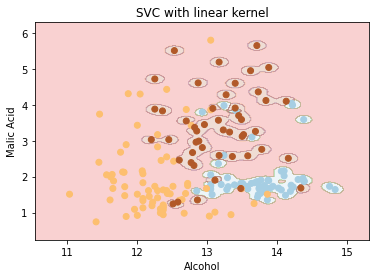

In [14]:
gamma_val = [0.5, 1, 10, 100]

for g in gamma_val:
    svc = train_model(X, y, kernel='rbf', C=1, gamma=g)
    print('Plot for gamma value: ',g)
    plot_model(X, y, svc, kernel='linear')

## Answer:
As we increase the value of gamma the model becomes more flexible and is able to classify the trainig data set more accurately. However, increasing the gamma also leads to overfitting of the training data and this model may not perform equaly well on the testing data set.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


In [20]:
print('Decision Tree')
dt = DecisionTreeClassifier(random_state = 10).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,dt.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))
print()
print('Logistic Regression')
lr = LogisticRegression(random_state = 10, solver = 'newton-cg').fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test, lr.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Decision Tree
Accuracy:  0.9098090849242922
ROC:  0.9040453749567611

Logistic Regression
Accuracy:  0.9315339038841343
ROC:  0.9734682742610166


In [25]:
print("Bagging Classifier Decision Tree")
bc_dt = BaggingClassifier(n_estimators = 50, random_state = 10).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,bc_dt.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, bc_dt.predict_proba(X_test)[:,1]))
print()

Bagging Classifier Decision Tree
Accuracy:  0.9368005266622779
ROC:  0.9796839729119637



In [27]:
print("Bagging Classifier Logistic Regression")
bc_lr = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 50, random_state = 10).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,bc_lr.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, bc_lr.predict_proba(X_test)[:,1]))
print()

Bagging Classifier Logistic Regression
Accuracy:  0.9308755760368663
ROC:  0.9755847499634477



#### Bagging improved accuracy and ROC for both classifiers. The improvement is greater for bagged decision trees than for bagged logistic regression classifies. This could be because the base logistic regression classifier was doing better than the base decision tree classifer. 

In [41]:
print("Random Forest")
rf = RandomForestClassifier()
parameters = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
clf_rf = GridSearchCV(rf, parameters).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,clf_rf.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]))
print()

Random Forest
Accuracy:  0.9552337063857801
ROC:  0.9891234188838844



In [58]:
clf_rf.best_params_ 

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}

In [42]:
print('Gradient Boosting')
gb = GradientBoostingClassifier()
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}
clf_gb = GridSearchCV(gb, parameters).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,clf_gb.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]))
print()



Gradient Boosting
Accuracy:  0.9552337063857801
ROC:  0.9889094533537314



In [57]:
clf_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 1.0}

In [43]:
print("Adaboost")
ab = AdaBoostClassifier()
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}
clf_ab = GridSearchCV(ab, parameters).fit(X_train,y_train)
print('Accuracy: ', accuracy_score(y_test,clf_ab.predict(X_test)))
print('ROC: ', roc_auc_score(y_test, clf_ab.predict_proba(X_test)[:,1]))
print()

Adaboost
Accuracy:  0.9512837393021725
ROC:  0.9858836241481498



In [56]:
clf_ab.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [62]:
rf_ac = []
rf_roc = []
gb_ac = []
gb_roc = []
ab_ac = []
ab_roc = []
n_est = [10,100,500]
for i in n_est:
    temp_ac = []
    temp_roc = []
    rf = RandomForestClassifier(n_estimators = i, criterion = 'gini',random_state=42).fit(X_train,y_train)
    gb = GradientBoostingClassifier(n_estimators = i, learning_rate=0.1, max_depth = 3, random_state=42, subsample = 1.0).fit(X_train,y_train)
    ab = AdaBoostClassifier(n_estimators = i, learning_rate= 0.1, random_state = 42).fit(X_train,y_train)
    
    rf_ac.append(accuracy_score(y_test,rf.predict(X_test)))
    rf_roc.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
    
    gb_ac.append(accuracy_score(y_test,gb.predict(X_test)))
    gb_roc.append(roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))
    
    ab_ac.append(accuracy_score(y_test,ab.predict(X_test)))
    ab_roc.append(roc_auc_score(y_test, ab.predict_proba(X_test)[:,1]))
    
    
    
    

Text(0, 0.5, 'Accuracy')

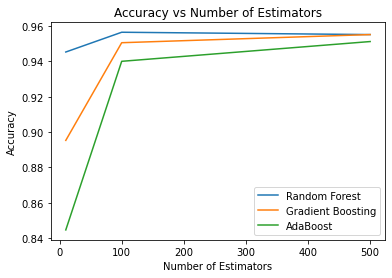

In [70]:
pd.DataFrame({'Random Forest': rf_ac,'Gradient Boosting': gb_ac, 'AdaBoost' : ab_ac}, index= n_est).plot.line()
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'ROC')

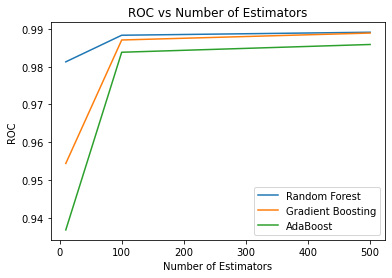

In [71]:
pd.DataFrame({'Random Forest': rf_roc,'Gradient Boosting': gb_roc, 'AdaBoost' : ab_roc}, index= n_est).plot.line()
plt.title('ROC vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC')

## Answer: